In [4]:
from typing import Union
from typing import Tuple
from typing import List
from typing import Dict
import numpy as np

In [5]:
def split(t: np.ndarray)-> Tuple[np.ndarray, int, np.ndarray]:
    menores = np.array([elemento for elemento in t if elemento < t[0]])
    mayores = np.array([elemento for elemento in t if elemento > t[0]])
    return (menores, t[0], mayores)

def qsel(t: np.ndarray, k: int)-> Union[int, None]:
    if len(t) == 1 and k == 0:
        return t[0]
    if len(t) == 0:
        return None
    
    t_l, mid, t_r = split(t)
    m = len(t_l)
    if k == m:
        return mid
    elif k < m:
        return qsel(t_l, k)
    else:
        return qsel(t_r, k-m-1)
    

a = np.array([5, 3, 2, 1, 7, 6, 9, -1, 12, 11, -4, -10, 4])

print("a:", a)
print("qsel rec: ", qsel(a, 4))

def qsel_nr(t: np.ndarray, k: int)-> Union[int, None]:
    
    if len(t) == 1 and k == 0:
        return t[0]
    if len(t) == 0:
        return None
    

    m = len(t)
    t_aux = t

    while m >= 1:
        t_l, mid, t_r = split(t_aux)
        m = len(t_l)
        
        if k == m:
            return mid
        elif k < m:
            t_aux = t_l
        else:
            t_aux = t_r
            k = k-m-1
        
        

print("qsel ite: ", qsel_nr(a, 4))

def split_pivot(t: np.ndarray, mid: int)-> Tuple[np.ndarray, int, np.ndarray]:
    menores = np.array([elemento for elemento in t if elemento < mid])
    mayores = np.array([elemento for elemento in t if elemento > mid])
    return (menores, mid, mayores)

def pivot5(t: np.ndarray)-> int:
    t_aux = [t[x:x+5] for x in range(0, len(t), 5)]
    print(t_aux)
    medians = [sorted(x)[len(x)//2] for x in t_aux]
    print(medians)
    mid = sorted(medians)[len(medians)//2]
    return mid

def qsel5_nr(t: np.ndarray, k: int)-> Union[int, None]:

    mid = pivot5(t)
    t_aux = t
    m = len(t)
    
    while m >= 1:
        t_l, mid, t_r = split_pivot(t_aux, mid)
        print(t_l, mid, t_r)
        m = len(t_l)
        
        if k == mid:
            return mid
        elif k < mid:
            t_aux = t_l
        else:
            t_aux = t_r
            k = k-mid+1


    

print("qsel5 ite: ", qsel5_nr(a, 4))
#sorted(a)[len(a)//2]

a: [  5   3   2   1   7   6   9  -1  12  11  -4 -10   4]
qsel rec:  2
qsel ite:  2
[array([5, 3, 2, 1, 7]), array([ 6,  9, -1, 12, 11]), array([ -4, -10,   4])]
[3, 9, -4]
[  2   1  -1  -4 -10] 3 [ 5  7  6  9 12 11  4]
[] 3 [ 5  7  6  9 12 11  4]
qsel5 ite:  None


In [6]:
def knapsack_fract_greedy(l_weights: List[int], l_values: List[int], bound: int)-> Dict:

    rel_vals = [(i, l_values[i]/l_weights[i]) for i in range(len(l_values))]

    rel_vals = sorted(rel_vals,key=lambda x: x[1], reverse=True)
    elementos_mochila = {elemento: 0 for elemento in range(len(l_values))}

    ctr = 0
    while bound > 0 and len(l_values) >= ctr:
        idx, _ = rel_vals[ctr]

        if l_weights[idx] <= bound:
            bound -= l_weights[idx]
            elementos_mochila[idx] = 1
        else:
            add = bound / l_weights[idx]
            bound -= add * l_weights[idx]
            elementos_mochila[idx] = add
        ctr += 1
    
    return elementos_mochila
    

w = [1, 2, 3, 4]
v = [40, 20, 100, 60]

knapsack_fract_greedy(w, v, 5)

def knapsack_01_pd(l_weights: List[int], l_values: List[int], bound: int)-> int:
    tabla = np.zeros((len(l_weights)+1, bound+1))

    print(tabla)

knapsack_01_pd(w,v, 5)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


[100000 100001 100002 100003 100004 100005 100006 100007 100008 100009]
[500000 500001 500002 500003 500004 500005 500006 500007 500008 500009]
[1000000 1000001 1000002 1000003 1000004 1000005 1000006 1000007 1000008
 1000009]
[2000000 2000001 2000002 2000003 2000004 2000005 2000006 2000007 2000008
 2000009]
[5000000 5000001 5000002 5000003 5000004 5000005 5000006 5000007 5000008
 5000009]
[7000000 7000001 7000002 7000003 7000004 7000005 7000006 7000007 7000008
 7000009]
[10000000 10000001 10000002 10000003 10000004 10000005 10000006 10000007
 10000008 10000009]


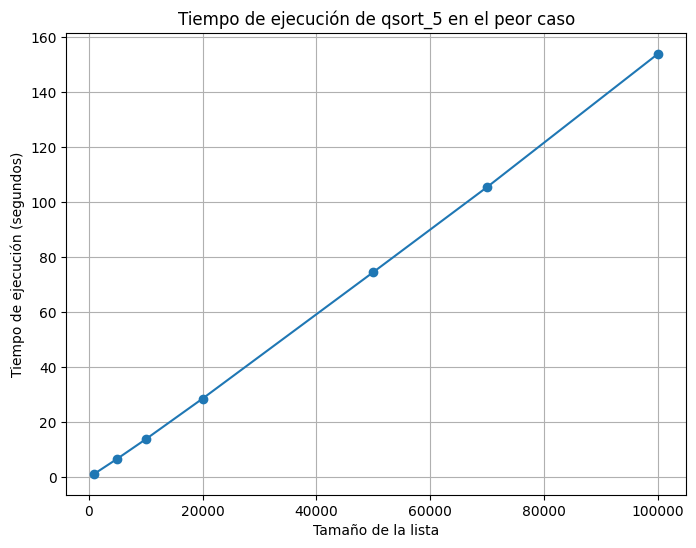

In [10]:

import matplotlib.pyplot as plt
import timeit
from p303 import qsort_5


execution_times = []


sizes_to_test = [1000, 5000, 10000, 20000, 50000, 70000, 100000] 

for size in sizes_to_test:
    test_list = np.array([size*100 + x for x in range(size*100)])
    print(test_list[:10])
    time_taken = timeit.timeit(lambda: qsort_5(test_list.copy()), number=1)
    execution_times.append(time_taken)


plt.figure(figsize=(8, 6))
plt.plot(sizes_to_test, execution_times, marker='o', linestyle='-')
plt.title('Tiempo de ejecución de qsort_5 en el peor caso')
plt.xlabel('Tamaño de la lista')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.grid(True)
plt.show()


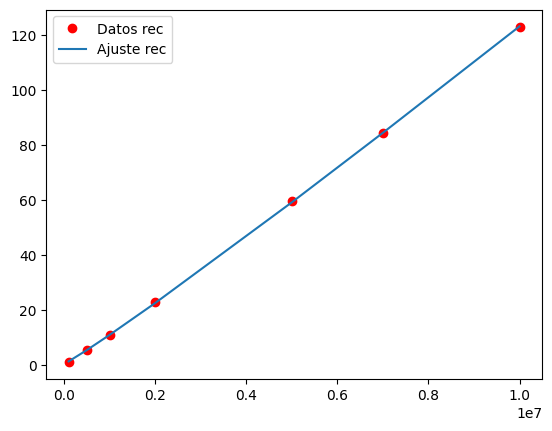

In [14]:
from scipy.optimize import curve_fit
import math

def tofit(x, a, b):
    return a * x * np.log(x) + b # f(x) = x**3 for matrix mult

x = np.array([size*100 for size in sizes_to_test])
y = np.array(execution_times) / np.array(execution_times)[0]
pars, _ = curve_fit(tofit, x, y)
a, b = pars
plt.plot(x, y, 'ro', label='Tiempos qsort5')
plt.plot(x, tofit(x, a, b), label='Ajuste qsort5')

plt.legend()
plt.show()